In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import numpy.typing as npt

from PIL import Image

In [2]:
DATA_ROOT = "../data/out"

In [3]:
def preprocess_image(img: npt.NDArray[np.float32]) -> npt.NDArray[np.uint8]:
    """
    Preprocesses an image by converting it to a 3-channel uint8 array.

    Parameters
    ----------
    img : numpy.typing.NDArray[np.float32]
        The input image array.

    Returns
    -------
    numpy.typing.NDArray[np.uint8]
        The preprocessed image array.
    """

    num_channels = img.shape[0]

    if num_channels == 1:
        img_2d = (np.squeeze(img, axis=0) * 255).astype(np.uint8)
        img = np.stack([img_2d] * 3, axis=0)
    return (np.transpose(img, axes=(1, 2, 0)) * 255).astype(np.uint8)

In [4]:
def plot_image(img: npt.NDArray[np.float32], ax: plt.Axes | None = None) -> None:
    """
    Plot an image on the given axes.

    Parameters
    ----------
    img : numpy.ndarray
        The image to be plotted.
    ax : matplotlib.axes.Axes, optional
        The axes on which to plot the image. If not provided, the current axes will be used.

    Returns
    -------
    None
    """
    ax = ax or plt.gca()
    ax.imshow(Image.fromarray(preprocess_image(img)), cmap=None)
    ax.axis("off")

In [5]:
def show_predictions_during_training(
    data_root, img_num: int, batch_num: int, epochs: list[int] | None
):
    """
    Display the original and predicted images during training for different epochs.

    Parameters
    ----------
    data_root : str
        The root directory of the data with predictions.
    img_num : int
        The index of the image to display.
    batch_num : int
        The index of the batch to display.
    epochs : list[int] | None, optional
        The list of epochs to display. If None, all available epochs will be displayed.

    Returns
    -------
    None
    """

    if epochs is None:
        epochs = [
            int(file_nm.split("_")[-1].removesuffix(".npz"))
            for file_nm in os.listdir(data_root)
        ]
    epochs.sort()

    fig, axes = plt.subplots(1, 1 + len(epochs), figsize=(10, 5))

    for i, (ax, epoch_num) in enumerate(zip(axes[1:], epochs)):
        x = np.load(os.path.join(data_root, f"slots_{epoch_num}.npz"))
        if i == 0:
            axes[0].set_title("Original Image\n")
            plot_image(x["original_img"][batch_num][img_num], axes[0])

        ax.set_title(f"Predicted Image\nepoch = {epoch_num}")
        plot_image(x["pred_img"][batch_num][img_num], ax)

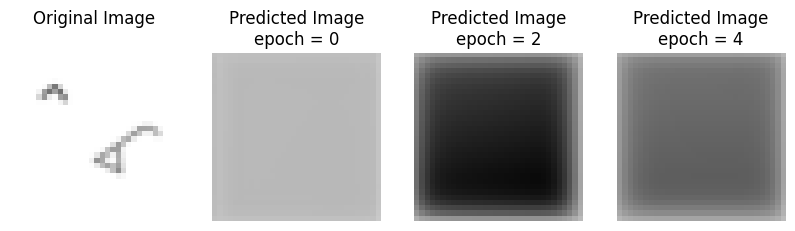

In [6]:
show_predictions_during_training(DATA_ROOT, img_num=3, batch_num=1, epochs=None)

In [7]:
def plot_slots(
    data_root, epoch, batch_num, img_num, slot_ids: list[int] | None = None
) -> None:
    x = np.load(os.path.join(data_root, f"slots_{epoch}.npz"))
    recons = x["recons"][batch_num][img_num]

    if slot_ids is None:
        slot_ids = list(range(recons.shape[0]))
        slot_ids.sort()

    fig, axes = plt.subplots(1, len(slot_ids) + 1, figsize=(10, 5))

    axes[0].set_title("Reconstructed image")
    plot_image(x["pred_img"][batch_num][img_num], axes[0])

    for slot, ax in zip(slot_ids, axes[1:]):
        ax.set_title(f"Slot {slot}")
        plot_image(np.transpose(recons[slot], (2, 0, 1)), ax)

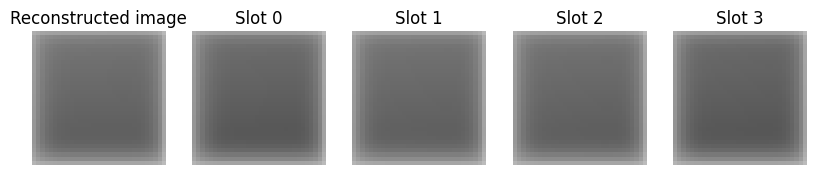

In [8]:
plot_slots(DATA_ROOT, epoch=4, batch_num=0, img_num=0, slot_ids=[0, 1, 2, 3])